In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Loading dataset
file_path = 'owid_covid_data_us_subset.csv'
covid_data = pd.read_csv(file_path)

# 1. Initial Inspection
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(covid_data.head())

# Check basic info to understand data types and non-null counts
print("\nDataset Info:")
covid_data.info()

# Check for missing values
print("\nMissing Values:")
print(covid_data.isnull().sum())

# Get basic statistics
print("\nBasic Statistics:")
print(covid_data.describe(include='all'))

# Convert 'date' column to datetime for proper time series plotting
covid_data['date'] = pd.to_datetime(covid_data['date'])

First few rows of the dataset:
         date  total_cases  new_cases  total_deaths  new_deaths  \
0  2020-07-21    3853351.0    60012.0      145801.0       932.0   
1  2020-07-22    3911870.0    58519.0      146668.0       867.0   
2  2020-07-23    3975206.0    63336.0      147861.0      1193.0   
3  2020-07-24    4047622.0    72416.0      149052.0      1191.0   
4  2020-07-25    4120764.0    73142.0      150306.0      1254.0   

   total_cases_per_million  total_deaths_per_million  icu_patients  \
0                11390.679                   430.994       11458.0   
1                11563.663                   433.557       12487.0   
2                11750.887                   437.084       13916.0   
3                11964.952                   440.604       13627.0   
4                12181.163                   444.311       14402.0   

   hosp_patients  weekly_hosp_admissions  daily_case_change_rate  \
0        42195.0                 30552.0                     NaN   
1        

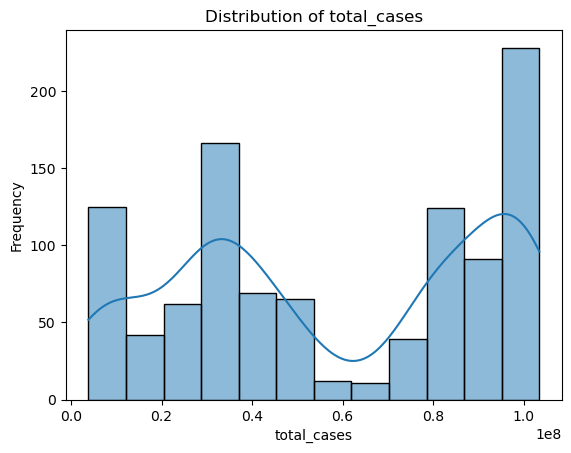

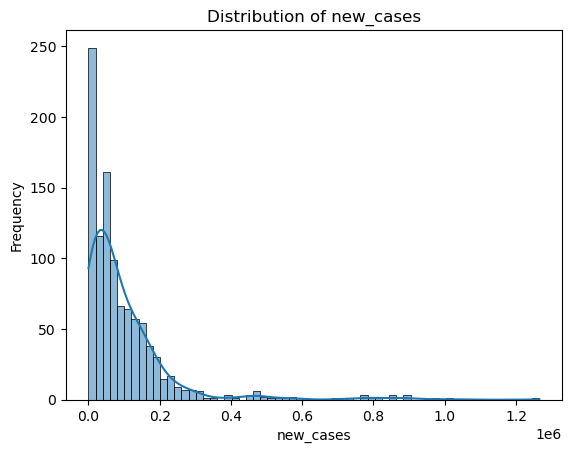

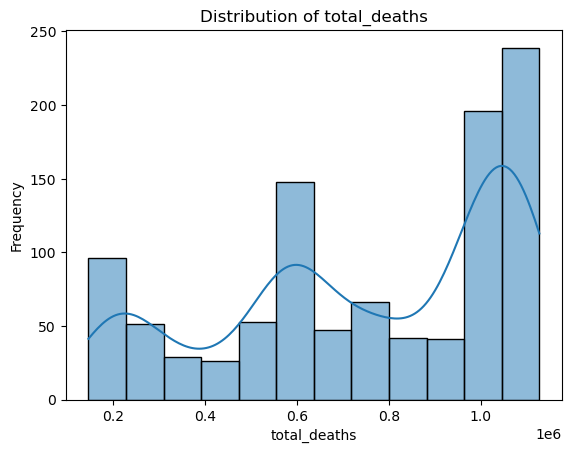

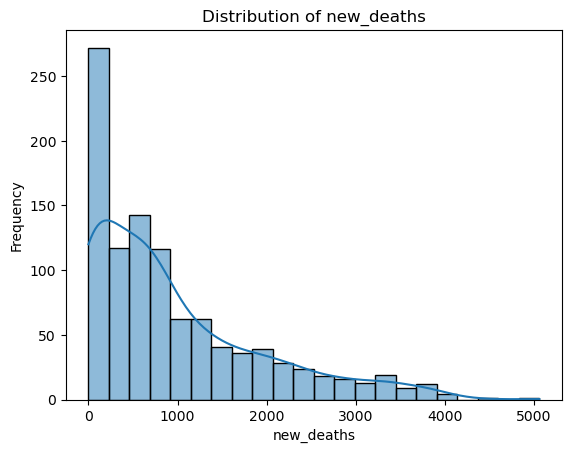

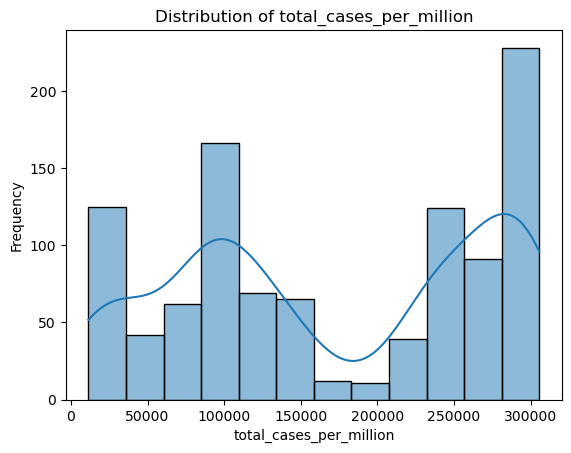

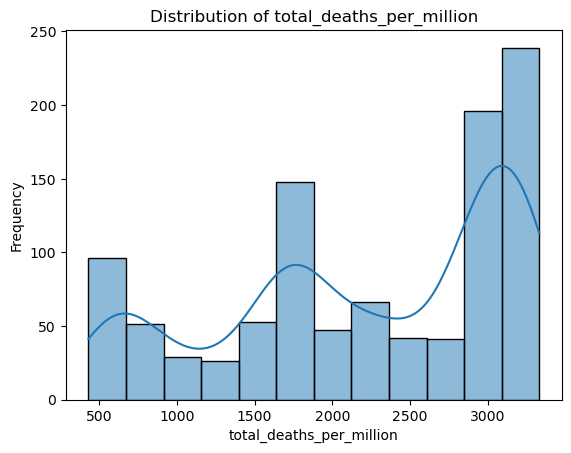

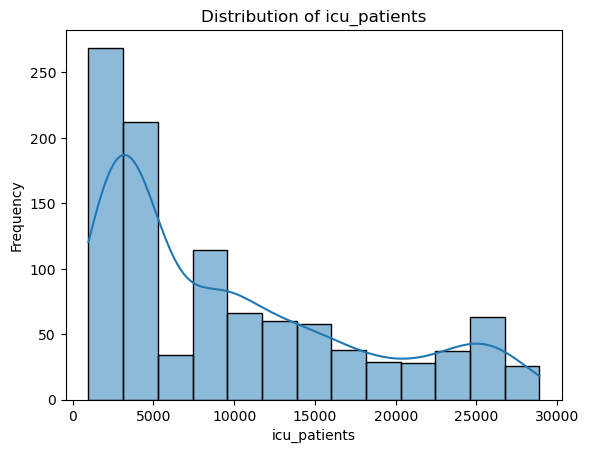

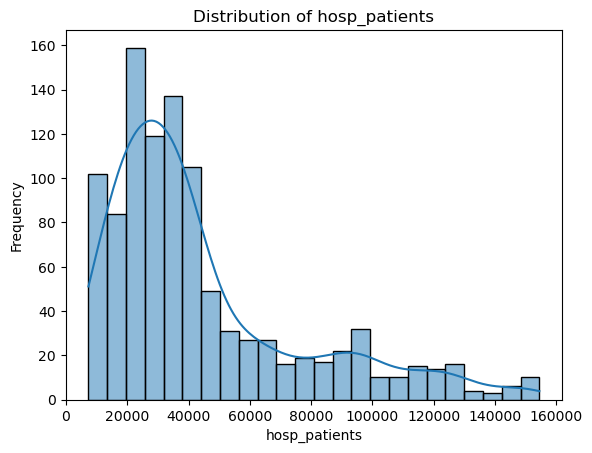

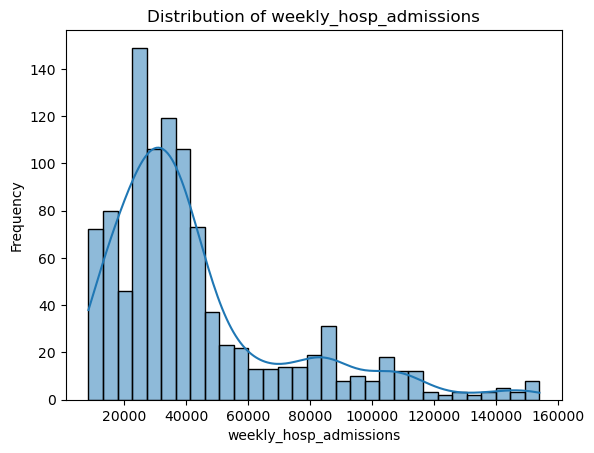

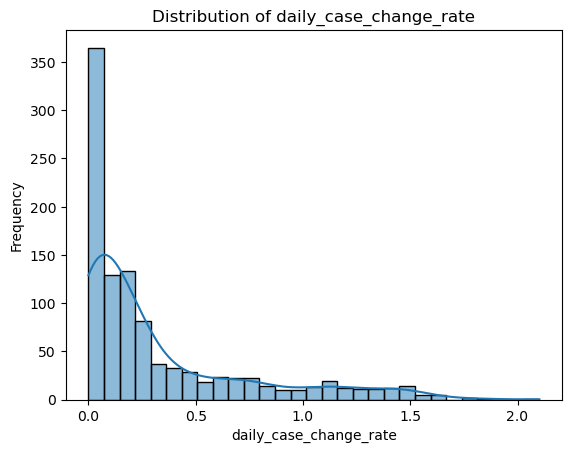

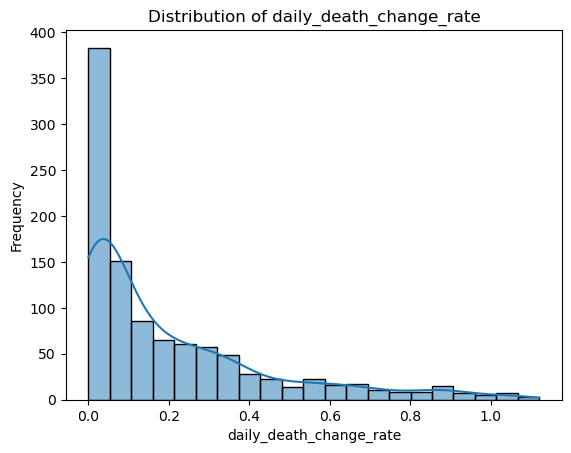

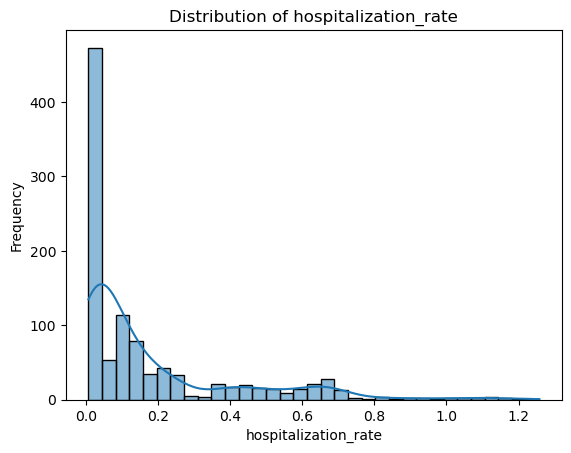

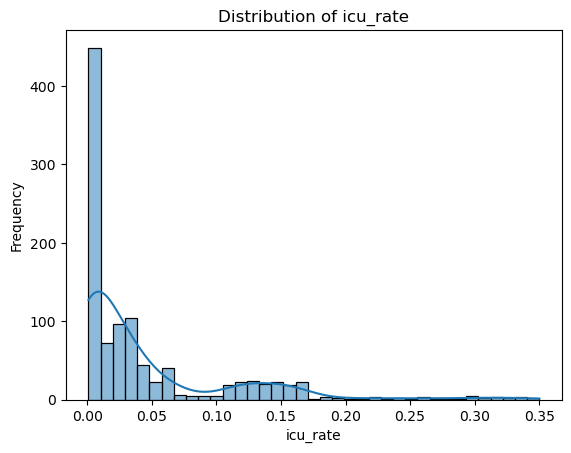

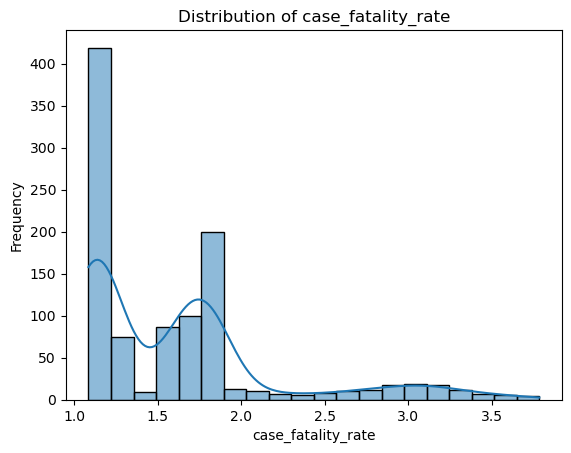

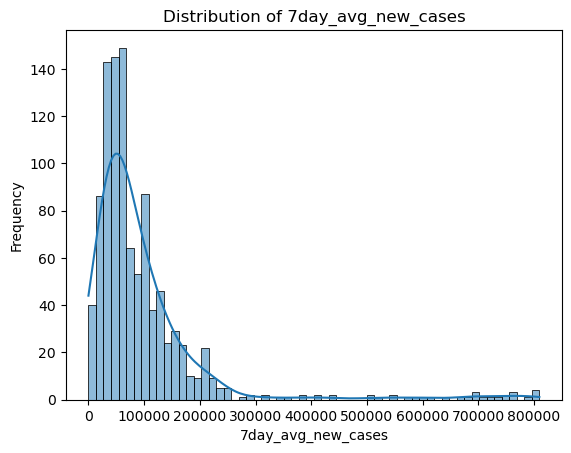

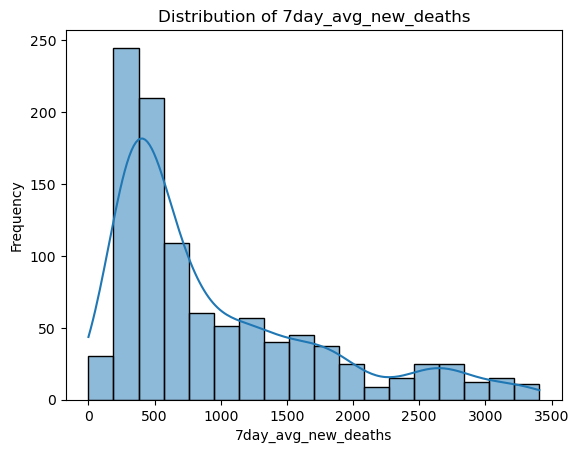

In [17]:
# 2. Univariate Analysis
# Plot distributions for numerical columns
numerical_cols = covid_data.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    plt.figure()
    sns.histplot(covid_data[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [18]:
# 3. Categorical Data Analysis
# Inspect unique values in categorical columns to understand their distribution
categorical_cols = covid_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(covid_data[col].value_counts().head())


Unique values in hospitalization_need:
hospitalization_need
High      352
Medium    341
Low       341
Name: count, dtype: int64

Unique values in icu_requirement:
icu_requirement
High      352
Medium    341
Low       341
Name: count, dtype: int64


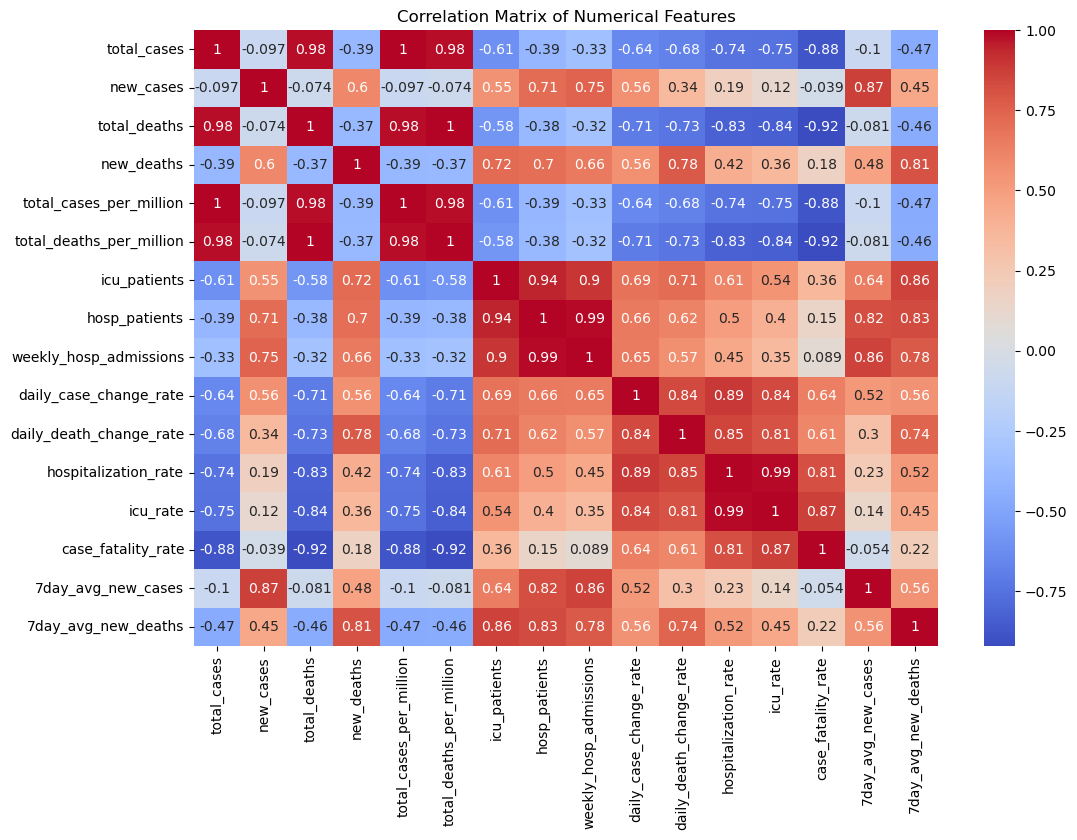

In [19]:
# 4. Pairwise Correlation Analysis
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(covid_data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()